# The Titanic --- Machine Learning Algorithm

##### IMPORTING LIBRARIES FOR LATER USE:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle

### IMPORTING 'train.csv' File:
This is to use its sample data and train the Machine to learn about the survival rates of the Titanic, hence the term "Machine Learning" 

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Understanding the basic information about the train.csv file (Data Types, Columns and Non-null count):
The data types and columns are important to focus upon for observing the correlation with the survival rates.
The non-null count also needs to be looked upon and the rest needs to be filled to recieve accurate predictions. 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploring more data in the file using graphs and value counts function:

<Axes: ylabel='Survived'>

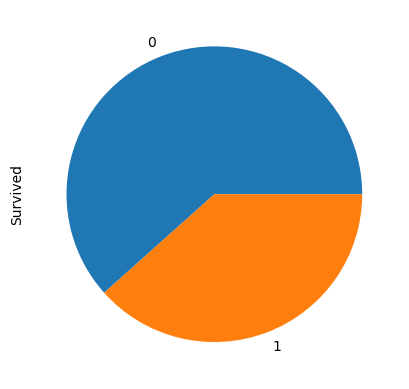

In [5]:
train["Survived"].value_counts().plot(kind='pie')

In [6]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
train[(train["Survived"]==1)
      &(train["Sex"]=="female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [8]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

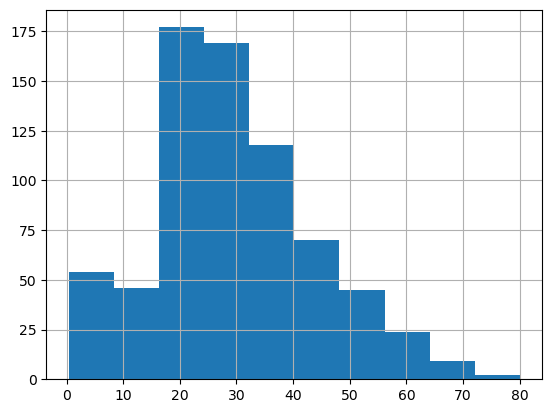

In [9]:
train["Age"].hist()

In [10]:
train["Age"].median()

28.0

In [11]:
train["Age"].mean()

29.69911764705882

In [12]:
train[(train["Sex"]=="female")
      &(train["Pclass"]==1)
      &(train["Survived"]==1)].shape[0]

91

In [13]:
train[(train["Sex"]=="male")
      &(train["Survived"]==1)].shape[0]

109

In [14]:
train[(train["Survived"]==1)
      &(train["SibSp"]==6)
      &(train["Sex"]=="female")].shape[0]

0

## Data Cleaning & Encoding

### Null Value Treatment
This is one of the few methods used to help with increasing the accuracy of the predictions made using the data.

In [15]:
#Looking at the number of null values that need to be treated
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train["Age"].fillna(train["Age"].median(),inplace=True)

In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train["Embarked"].mode()[0]

'S'

In [19]:
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)

In [20]:
train[train["Pclass"]==1].isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        0
dtype: int64

In [21]:
train["Cabin"].fillna("N/A",inplace=True)

In [22]:
train["Cabin"].unique()

array(['N/A', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train.drop(columns=["Name", "Ticket"],inplace=True)

In [25]:
train["Cabin"] = train["Cabin"].str[0]

In [26]:
train["Cabin"].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [27]:
train = pd.get_dummies(train,columns=["Cabin","Sex","Embarked"])
##Get dummies is used to add dummy values in null cells of the data file in this context (form of data manipulation)

### Variable Selection

In [28]:
#Understanding the correlation between different columns containing data of the passenger with their survival rate.
train.corr().abs()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.005007,0.035144,0.034212,0.057527,0.001652,0.012658,0.003256,0.069552,0.040957,...,0.042351,0.035772,0.060049,0.019919,0.013814,0.042939,0.042939,0.001205,0.033606,0.022204
Survived,0.005007,1.000000,0.338481,0.064910,0.035322,0.081629,0.257307,0.022287,0.175095,0.114652,...,0.145321,0.057935,0.016040,0.316912,0.026456,0.543351,0.543351,0.168240,0.003650,0.149683
Pclass,0.035144,0.338481,1.000000,0.339898,0.083081,0.018443,0.549500,0.204934,0.369572,0.417048,...,0.230091,0.011063,0.055561,0.725541,0.052496,0.131900,0.131900,0.243292,0.221009,0.074053
Age,0.034212,0.064910,0.339898,1.000000,0.233296,0.172482,0.096688,0.121732,0.096080,0.115188,...,0.120483,0.076393,0.075406,0.240314,0.040285,0.081163,0.081163,0.030248,0.031415,0.006729
SibSp,0.057527,0.035322,0.083081,0.233296,1.000000,0.414838,0.159651,0.046266,0.034538,0.029251,...,0.036865,0.001706,0.001402,0.040460,0.015907,0.114631,0.114631,0.059528,0.026354,0.068734
Parch,0.001652,0.081629,0.018443,0.172482,0.414838,1.000000,0.216225,0.040325,0.056498,0.030736,...,0.016554,0.023694,0.072388,0.036987,0.015878,0.245489,0.245489,0.011069,0.081228,0.060814
Fare,0.012658,0.257307,0.549500,0.096688,0.159651,0.216225,1.000000,0.019549,0.386297,0.364318,...,0.053717,0.033093,0.025180,0.482075,0.002224,0.182333,0.182333,0.269335,0.117216,0.162184
Cabin_A,0.003256,0.022287,0.204934,0.121732,0.046266,0.040325,0.019549,1.000000,0.030880,0.034846,...,0.025256,0.015923,0.008787,0.240136,0.004386,0.078271,0.078271,0.093040,0.040246,0.056180
Cabin_B,0.069552,0.175095,0.369572,0.096080,0.034538,0.056498,0.386297,0.030880,1.000000,0.062841,...,0.045547,0.028715,0.015847,0.433053,0.007910,0.109689,0.109689,0.168642,0.072579,0.102063
Cabin_C,0.040957,0.114652,0.417048,0.115188,0.029251,0.030736,0.364318,0.034846,0.062841,1.000000,...,0.051398,0.032403,0.017883,0.488683,0.008926,0.058649,0.058649,0.113952,0.049776,0.068502


### Splitting The Data
Here, the data will be divided into two categories. The dependent variable, in which the survival data is, and the independent variable, in which the data having high correlation to the suvival data is.

In [29]:
dep = train["Survived"]
ind = train[["Pclass","Cabin_N","Sex_female","Fare"]]

In [30]:
ind

,Pclass,Cabin_N,Sex_female,Fare
0,3,1,0,7.2500
1,1,0,1,71.2833
2,3,1,1,7.9250
3,1,0,1,53.1000
4,3,1,0,8.0500
...,...,...,...,...
886,2,1,0,13.0000
887,1,0,1,30.0000
888,3,1,1,23.4500
889,1,0,0,30.0000


In [31]:
from sklearn.model_selection import train_test_split 
ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep,test_size=0.3,random_state=100)


#from sklearn.preprocessing import RobustScaler

#robust_scaler = RobustScaler() 
#new_scaled_data = robust_scaler.fit_transform(ind_train)
#ind_train = pd.DataFrame(new_scaled_data,columns=ind_train.columns)

#new_scaled_data = robust_scaler.fit_transform(ind_test)

#ind_test = pd.DataFrame(new_scaled_data,columns=ind_test.columns)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
new_scaled_data = scaler.fit_transform(ind_train)
ind_train = pd.DataFrame(new_scaled_data,columns=ind_train.columns)

new_scaled_data = scaler.fit_transform(ind_test)

ind_test = pd.DataFrame(new_scaled_data,columns=ind_test.columns)

In [33]:
ind_train

,Pclass,Cabin_N,Sex_female,Fare
0,0.843816,0.563138,-0.738854,-0.462475
1,0.843816,0.563138,1.353447,-0.324753
2,0.843816,0.563138,-0.738854,-0.477166
3,-0.345544,0.563138,1.353447,-0.326669
4,-1.534905,-1.775763,-0.738854,-0.628459
...,...,...,...,...
618,0.843816,0.563138,1.353447,-0.449301
619,-1.534905,-1.775763,1.353447,0.378545
620,-1.534905,-1.775763,1.353447,0.964958
621,0.843816,0.563138,1.353447,0.704206


In [34]:
dep_train

69     0
85     1
794    0
161    1
815    0
      ..
855    1
871    1
835    1
792    0
520    1
Name: Survived, Length: 623, dtype: int64

In [35]:
ind_test

,Pclass,Cabin_N,Sex_female,Fare
0,0.789963,-1.990719,1.360538,-0.471268
1,0.789963,0.502331,1.360538,-0.531062
2,0.789963,0.502331,-0.735003,-0.512931
3,-0.426762,0.502331,1.360538,-0.470400
4,-0.426762,0.502331,-0.735003,-0.412534
...,...,...,...,...
263,0.789963,0.502331,1.360538,-0.378874
264,-1.643486,-1.990719,1.360538,4.178254
265,0.789963,0.502331,-0.735003,-0.530677
266,0.789963,0.502331,1.360538,-0.429026


In [36]:
dep_test

205    0
44     1
821    1
458    1
795    0
      ..
111    0
730    1
105    0
479    1
277    0
Name: Survived, Length: 268, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(ind_train,dep_train)

LogisticRegression()

Here, Logistic regression is used to look at the accuracy of the model (the probability that its predictions will be correct)

In [38]:
model.score(ind_test,dep_test)

0.7761194029850746

In [39]:
dep_predict = model.predict(ind_test)

In [40]:
dep_predict

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
tn_fp,fn_tp = confusion_matrix(dep_test, dep_predict)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 136
False Positive: 23
False Negative: 37
True Positive: 72


In [42]:
from sklearn.metrics import classification_report
print(classification_report(dep_test, dep_predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       159
           1       0.76      0.66      0.71       109

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



#### K-Nearest Neighbour Algorithm
This is a method which is used to try and increase the accuracy of this model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(ind_train, dep_train)
knn_predict = knn.predict(ind_test)
knn.score(ind_test,dep_test)

0.7686567164179104

In [44]:
from sklearn.metrics import confusion_matrix
tn_fp,fn_tp = confusion_matrix(dep_test, knn_predict)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 138
False Positive: 21
False Negative: 41
True Positive: 68


##### Cross validation for determining the neighbour size

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
ind = scaler.fit_transform(ind)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, ind, dep, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

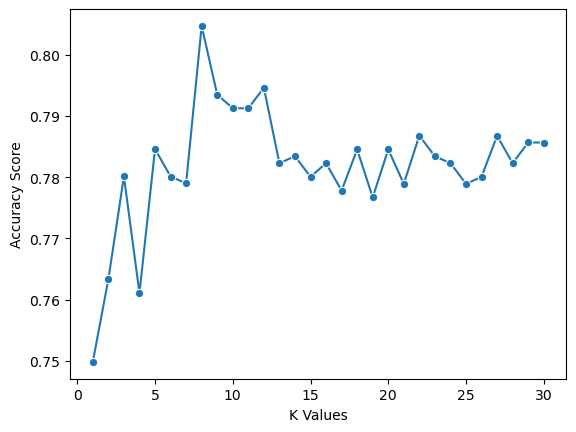

In [46]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#### Support Vector Machine

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')
svc.fit(ind_train,dep_train)
svc_pred = svc.predict(ind_test)
print(accuracy_score(dep_test,svc_pred))

0.7798507462686567


In [48]:
from sklearn.metrics import confusion_matrix
tn_fp,fn_tp = confusion_matrix(dep_test, svc_pred)

print(f"True Negative: {tn_fp[0]:,}")
print(f"False Positive: {tn_fp[1]:,}")
print(f"False Negative: {fn_tp[0]:,}")
print(f"True Positive: {fn_tp[1]:,}")

True Negative: 137
False Positive: 22
False Negative: 37
True Positive: 72


#### Save the Model -- Pickling
##### THE MODEL IS FINALLY READY!

In [49]:
with open("ml_model.pkl","wb") as file:
    pickle.dump(model,file)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,1,0,0,1,0,0,1
